In [15]:
#Data_preprocessing

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [36]:
# Load the dataset
try:
    df = pd.read_csv(r"D:\NTI Machine Learning\project 1\EMPLOYEE_TURNOVER.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: EMPLOYEE_TURNOVER.csv not found. Please make sure the file is in the correct directory.")
    exit()
     

Dataset loaded successfully!


In [37]:
# Display the first few rows

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:

df.shape

(14999, 10)

In [39]:
# Check the data types and non-null values
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [40]:
# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
df.describe()
     


--- Descriptive Statistics ---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [41]:
# Check for missing values
print("\n--- Missing Values Count ---")
print(df.isnull().sum())
     


--- Missing Values Count ---
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


In [42]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")


Number of duplicate entries: 3008


In [43]:
# Identify the rows that contain duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
duplicate_rows.head(20)


Duplicate Rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [44]:
# # Remove duplicate values if they exist
# if duplicates > 0:
#     df.drop_duplicates(inplace=True)
#     print("Duplicate entries have been removed.")

# # Check for null values
# nulls = df.isnull().sum()
# print("\nNumber of null values in each column:")
# print(nulls[nulls > 0]

In [45]:
df.shape

(14999, 10)

In [46]:
#EDA

In [47]:
# Identify the target variable (churn indicator)
# Based on the file contents, 'quit' seems to be the churn indicator.
# Let's confirm its unique values.
print("\n--- Unique values for 'quit' column ---")
print(df['quit'].unique())

# Assuming 'quit' is the target variable, where 1 means the employee quit and 0 means they did not.
target_variable = 'quit'
print(f"\nIdentified target variable: '{target_variable}'")


--- Unique values for 'quit' column ---
[1 0]

Identified target variable: 'quit'


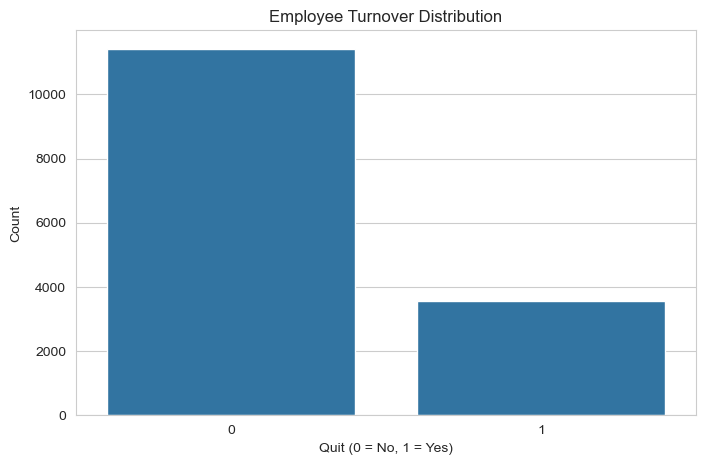

In [48]:
# Set style for plots
sns.set_style("whitegrid")

# 1. Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quit', data=df)
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


--- Examining Each Feature ---

--- Feature: satisfaction_level ---
Represents: Satisfaction Level
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


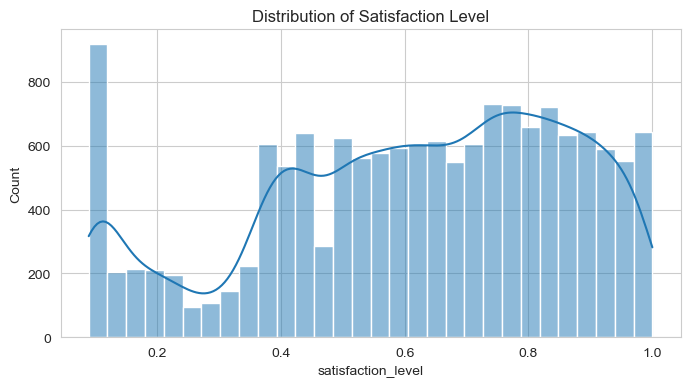


--- Feature: last_evaluation ---
Represents: Last Evaluation
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64


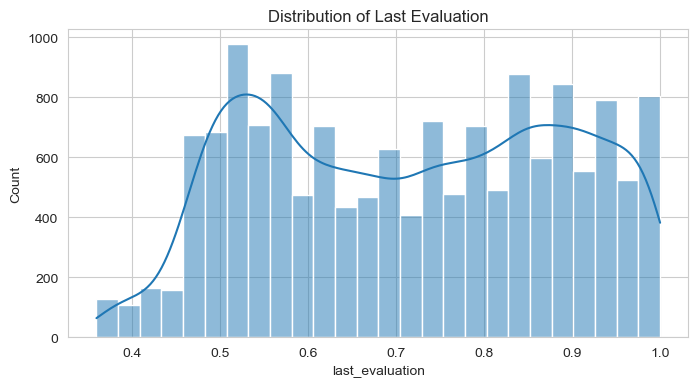


--- Feature: number_project ---
Represents: Number Project
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64


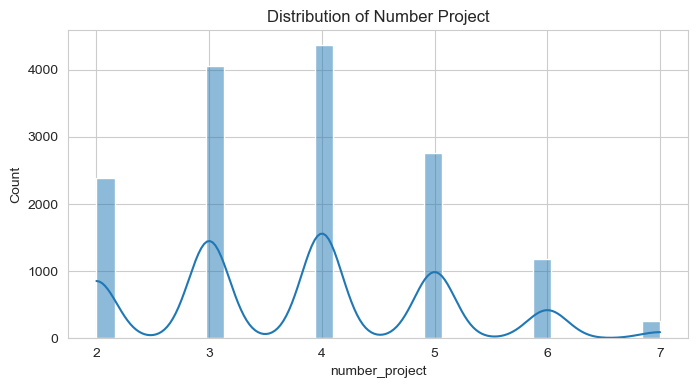


--- Feature: average_montly_hours ---
Represents: Average Montly Hours
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64


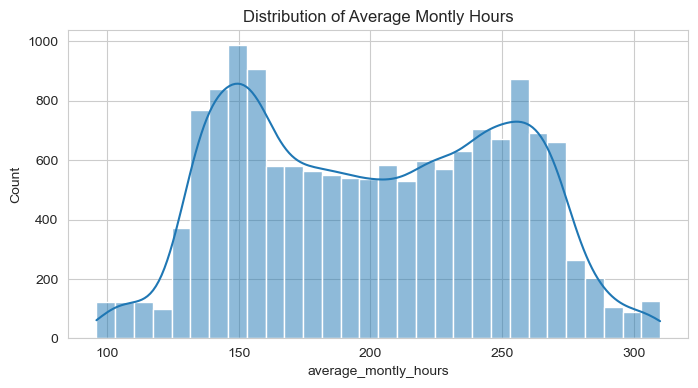


--- Feature: time_spend_company ---
Represents: Time Spend Company
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64


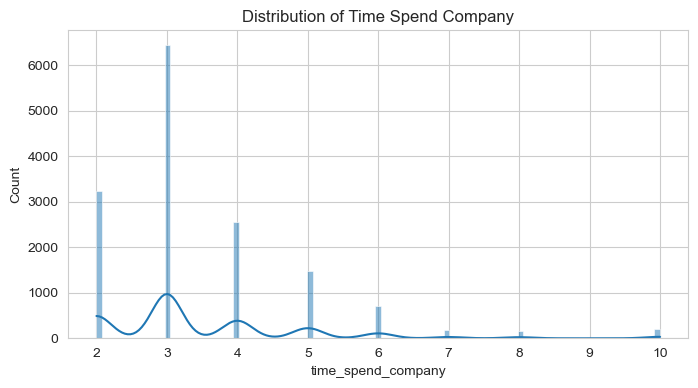


--- Feature: Work_accident ---
Represents: Work Accident
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64


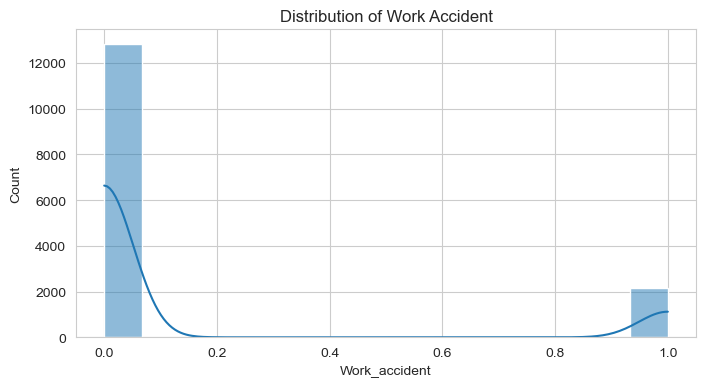


--- Feature: quit ---
Represents: Quit
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: quit, dtype: float64


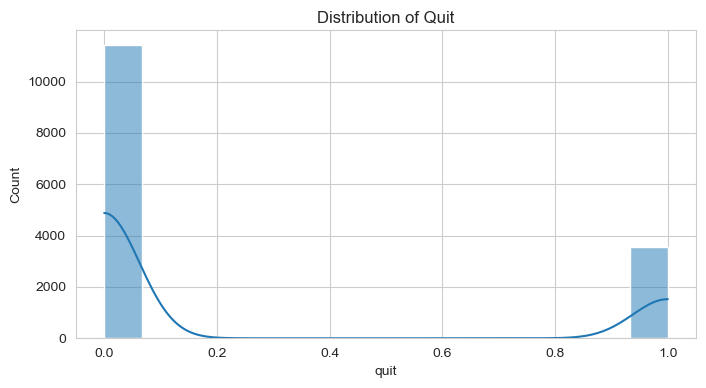


--- Feature: promotion_last_5years ---
Represents: Promotion Last 5Years
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64


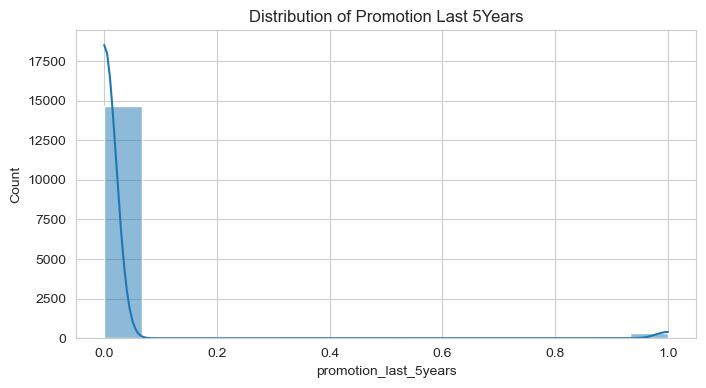


--- Feature: department ---
Represents: Department
Data Type: Categorical
Unique Values:
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Value Counts:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


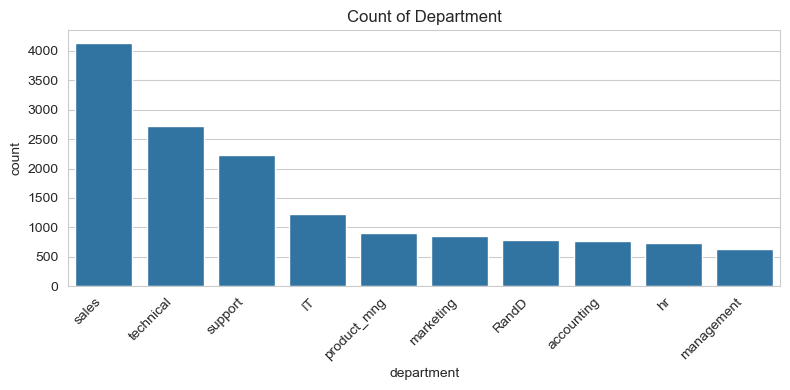


--- Feature: salary ---
Represents: Salary
Data Type: Categorical
Unique Values:
['low' 'medium' 'high']
Value Counts:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


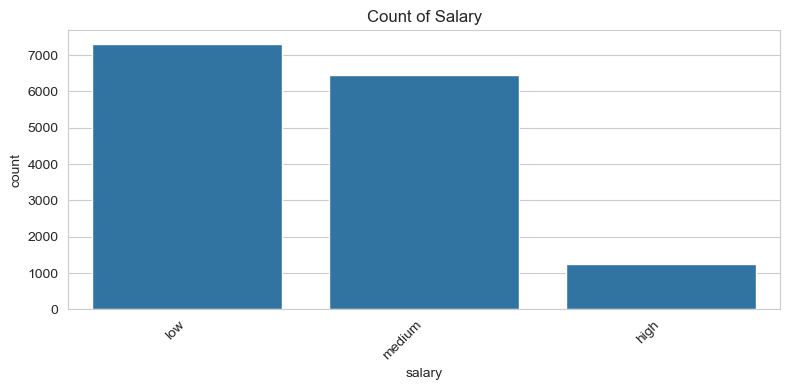

In [49]:
# ---3. Univariate Analysis (Numerical Features) &(categorial Feature) ---

print("\n--- Examining Each Feature ---")
for column in df.columns:
    print(f"\n--- Feature: {column} ---")
    print(f"Represents: {column.replace('_', ' ').title()}") # Basic representation based on column name

    if df[column].dtype in ['int64', 'float64']:
        print("Data Type: Numerical")
        print("Distribution (Descriptive Statistics):")
        print(df[column].describe())
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column.replace("_", " ").title()}')
        plt.show()
    else:
        print("Data Type: Categorical")
        print("Unique Values:")
        print(df[column].unique())
        print("Value Counts:")
        print(df[column].value_counts())
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Count of {column.replace("_", " ").title()}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
     


--- Target Variable (quit) Distribution ---
quit
0    11428
1     3571
Name: count, dtype: int64
Turnover Rate: 23.81%


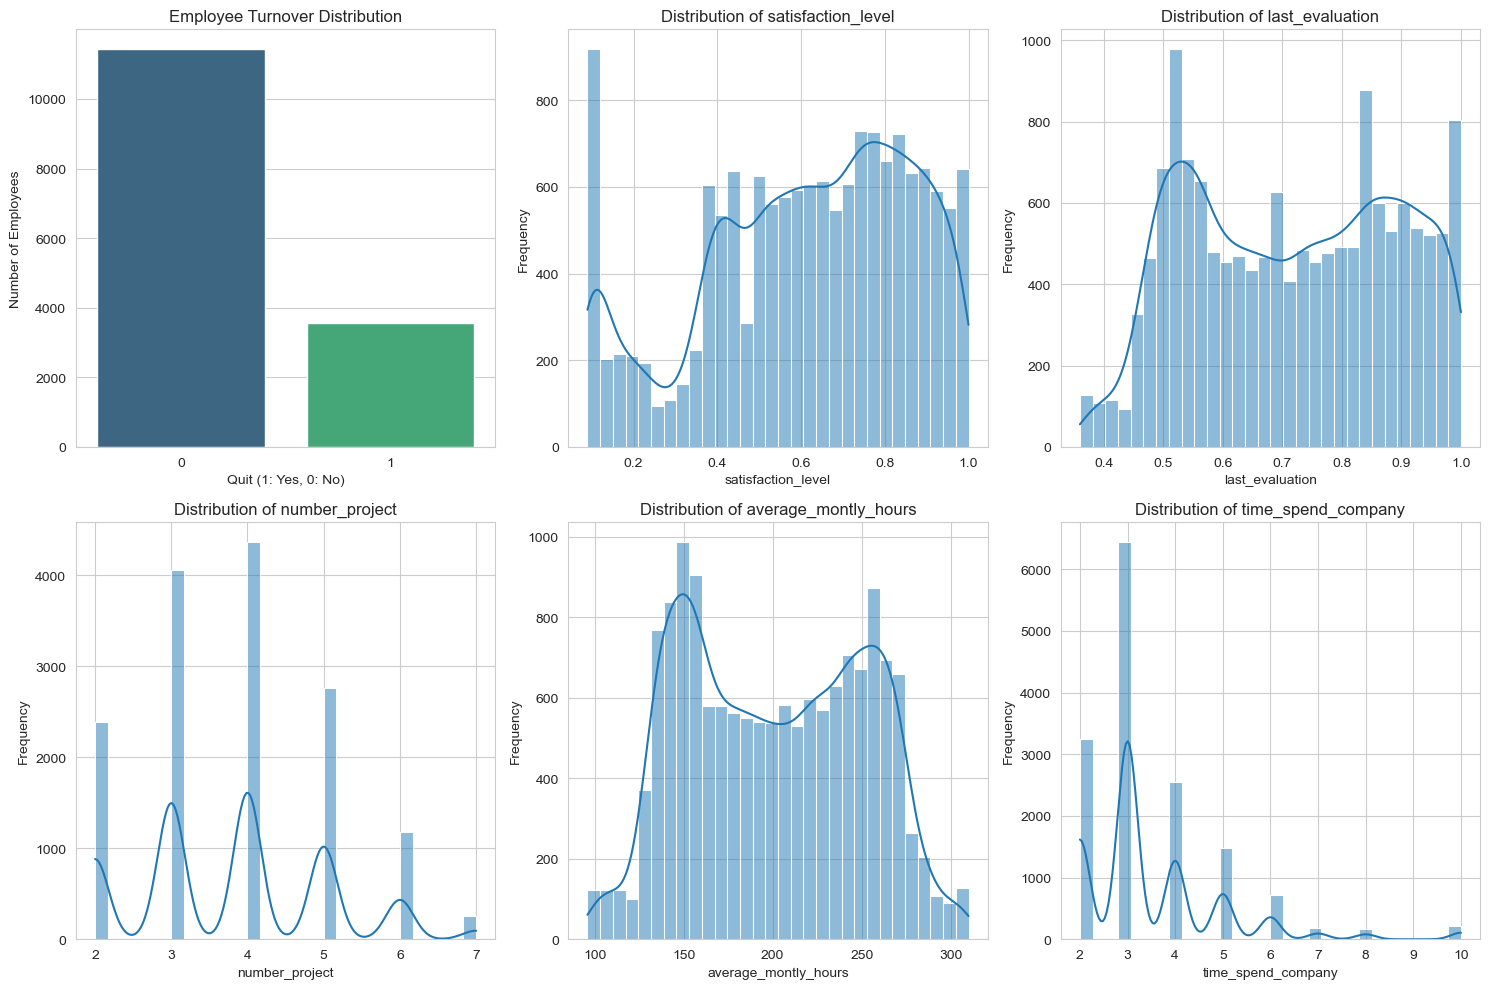

In [50]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- Target Variable Analysis ---
print("\n--- Target Variable (quit) Distribution ---")
plt.subplot(2, 3, 1)
sns.countplot(x='quit', data=df, palette='viridis')
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (1: Yes, 0: No)')
plt.ylabel('Number of Employees')
quit_counts = df['quit'].value_counts()
print(quit_counts)
print(f"Turnover Rate: {quit_counts[1] / len(df) * 100:.2f}%")

# --- Univariate Analysis (Numerical Features) ---
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 2)
    sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
     

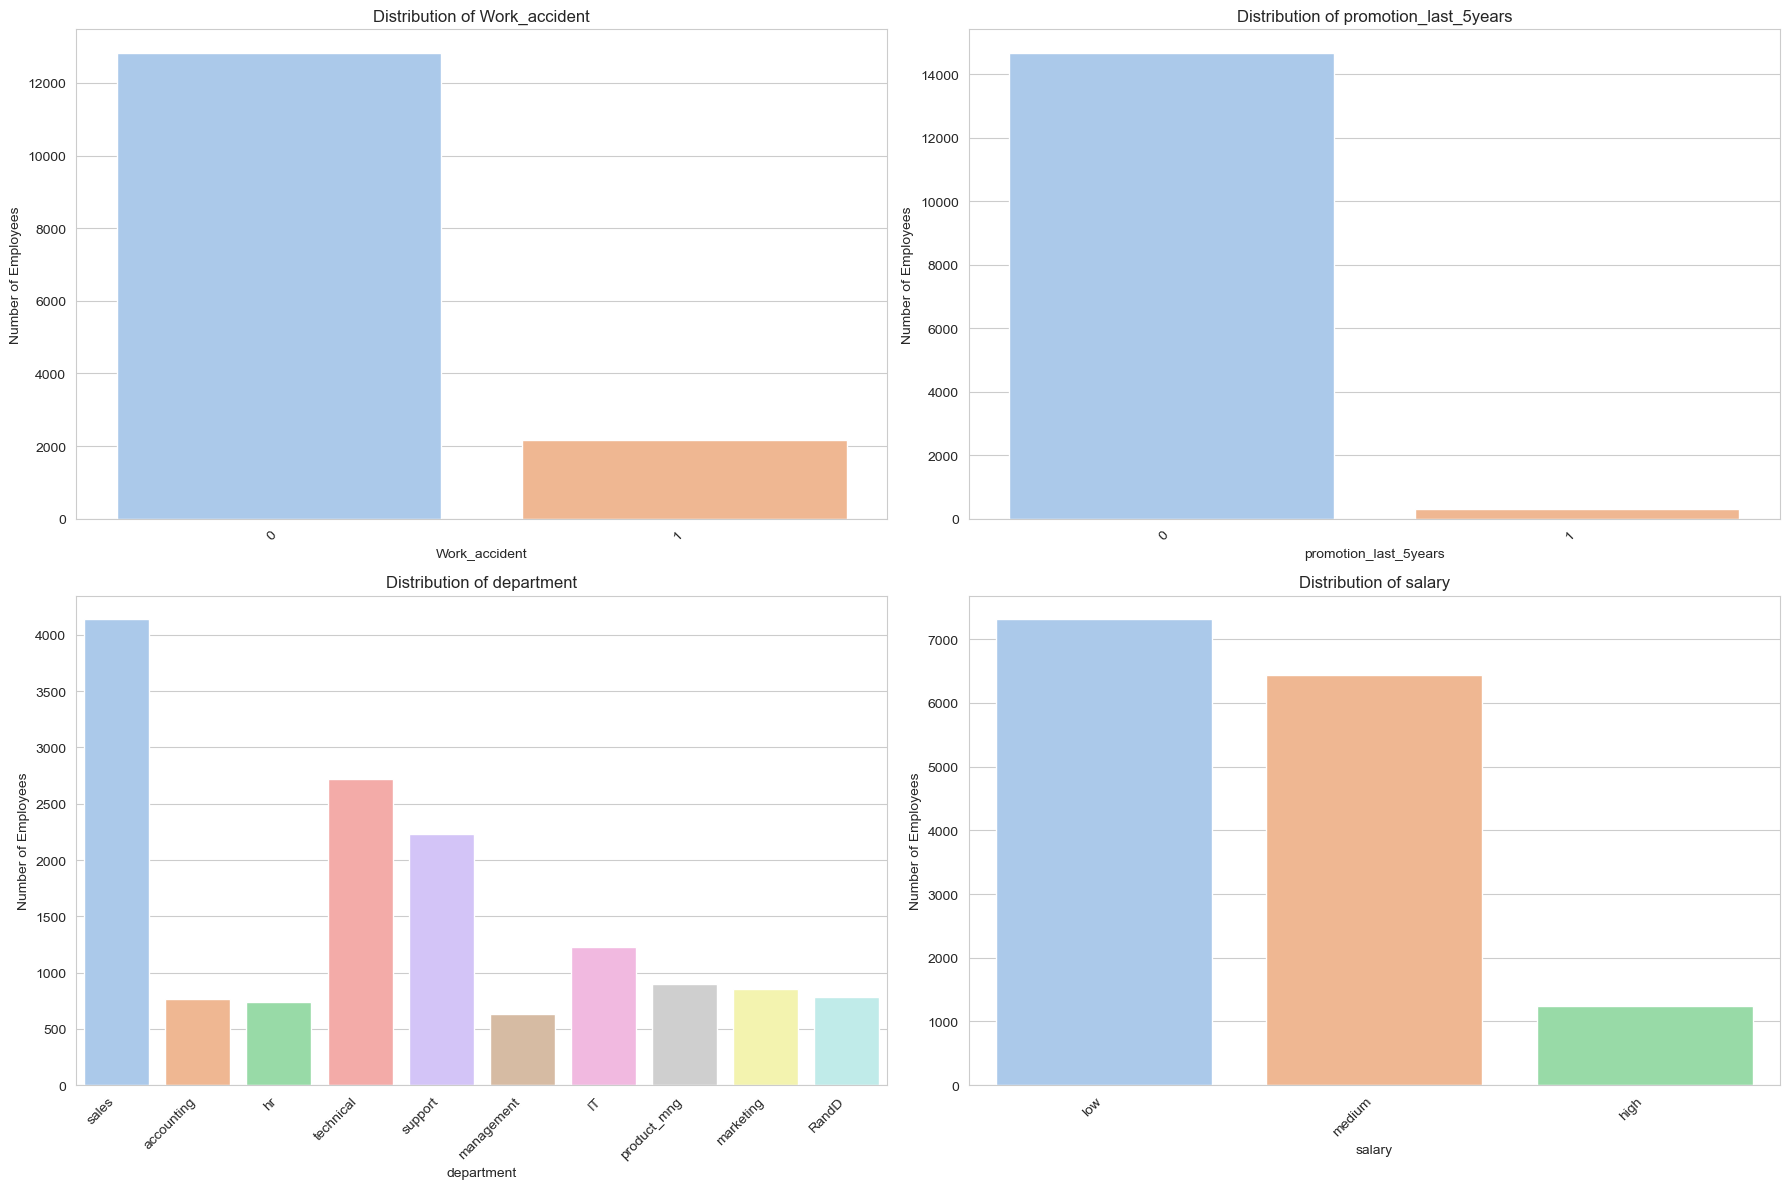

In [51]:
# --- Univariate Analysis (Categorical Features) ---
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
     

In [52]:
# Statistical Analysis

print("\n--- Descriptive Statistics for Numerical Features ---")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable if it's numerical and not a continuous feature
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

if numerical_features:
    print(df[numerical_features].describe())
else:
    print("No numerical features found for descriptive statistics (excluding target variable).")

print("\n--- Analyzing Categorical Features Distribution ---")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
if categorical_features:
    for feature in categorical_features:
        print(f"\nDistribution for {feature}:")
        print(df[feature].value_counts(normalize=True) * 100)
else:
    print("No categorical features found for distribution analysis.")


--- Descriptive Statistics for Numerical Features ---
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.


--- Creating Visualizations ---


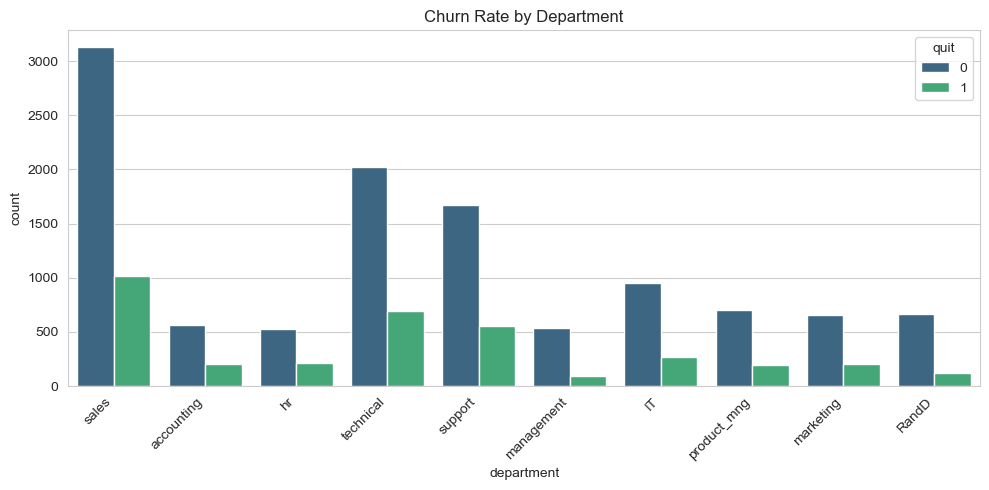

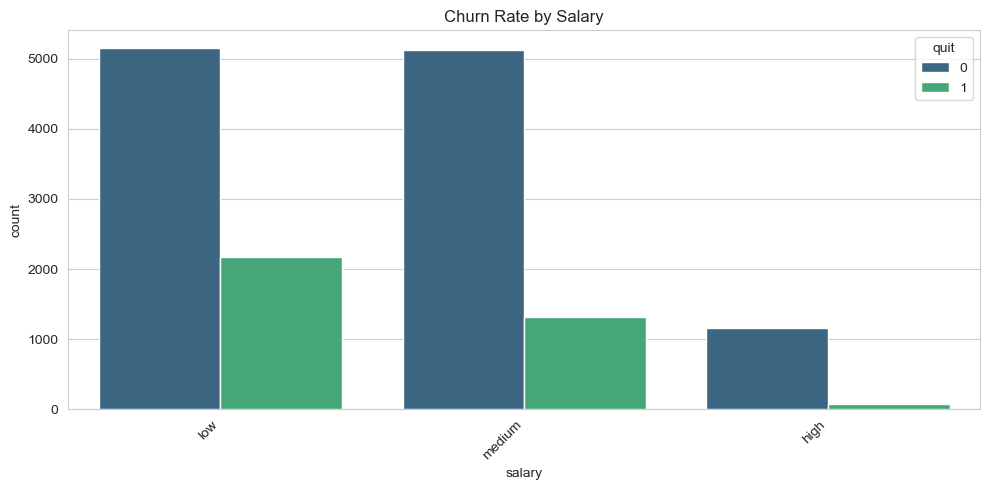

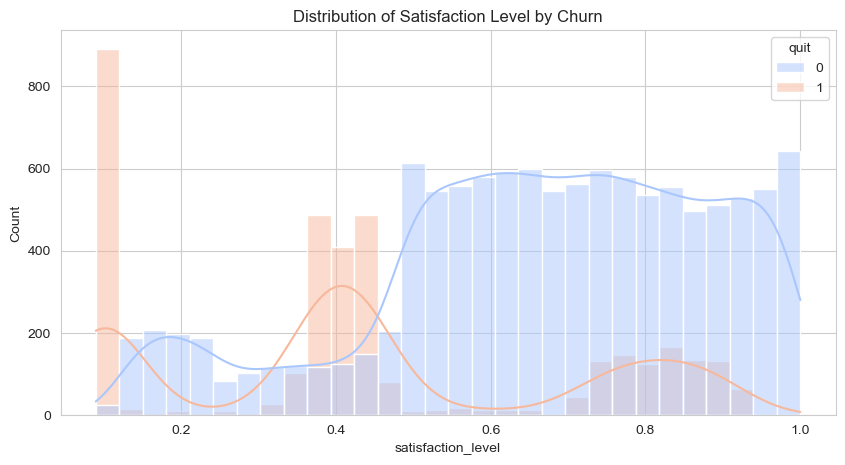

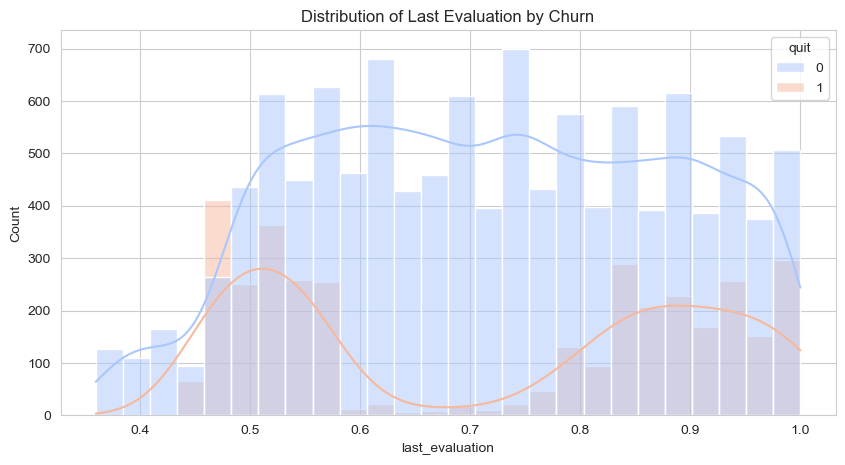

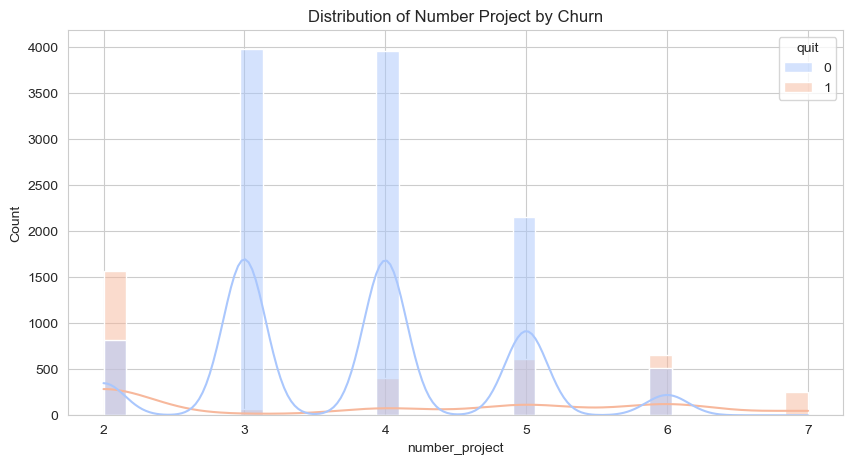

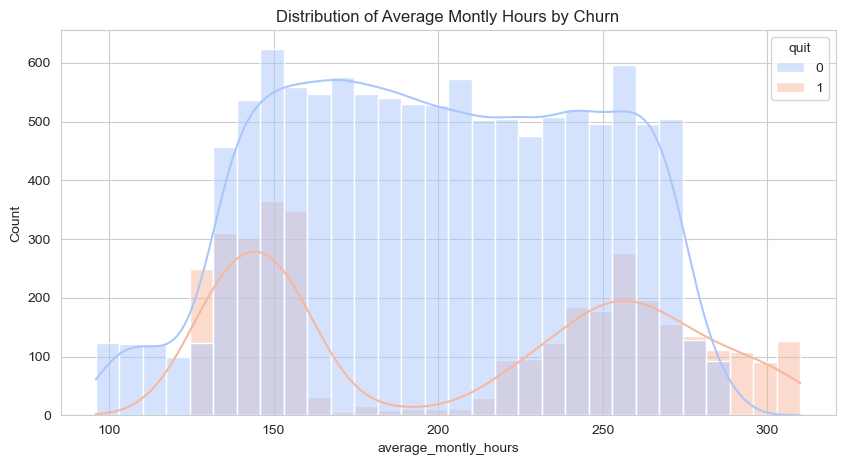

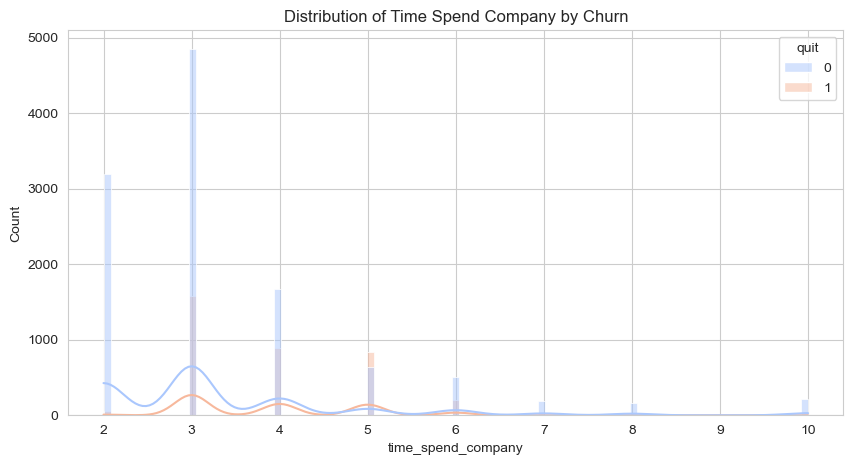

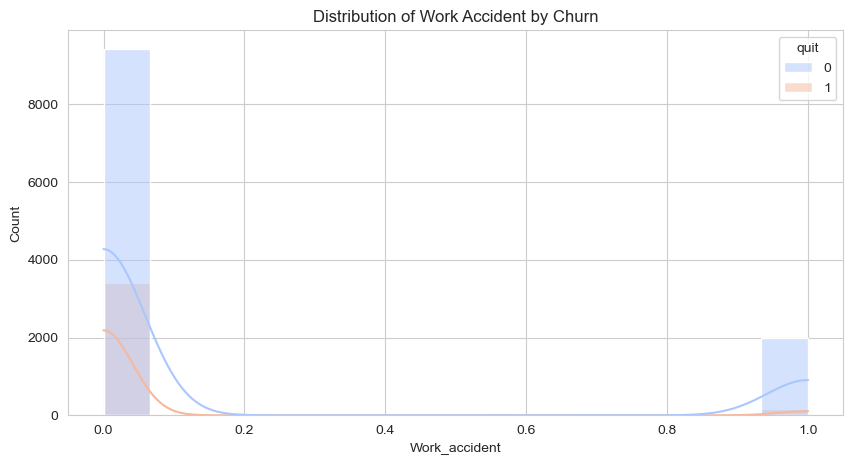

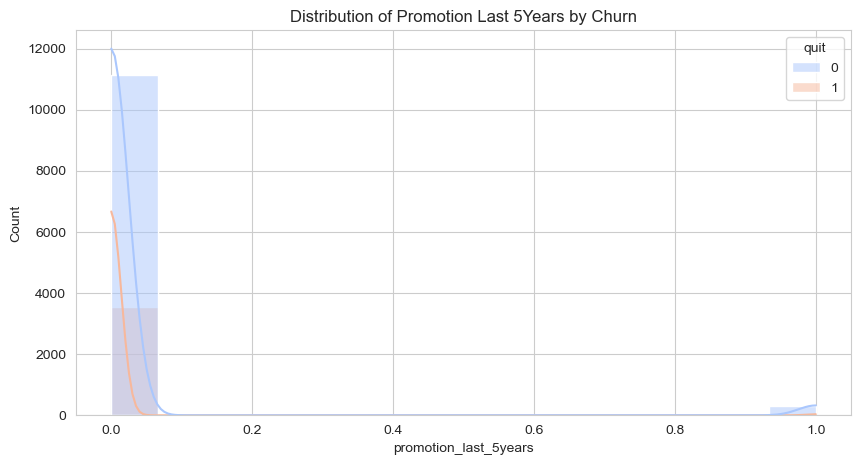

In [53]:
# Visualizations for Statistical Analysis

print("\n--- Creating Visualizations ---")

# Churn rate by different categories
categorical_features_for_churn = [col for col in df.select_dtypes(include='object').columns if col != target_variable]
for feature in categorical_features_for_churn:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue=target_variable, palette='viridis')
    plt.title(f'Churn Rate by {feature.replace("_", " ").title()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Distribution plots for numerical features (already done in Step 3, but can be re-emphasized)
# For numerical features, we can also look at their distribution conditioned on churn
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, palette='coolwarm')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Churn')
    plt.show()
     


--- Checking for Outliers in Numerical Data (using Box Plots) ---


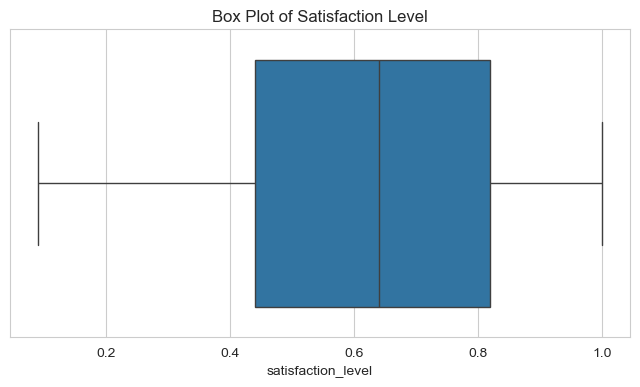

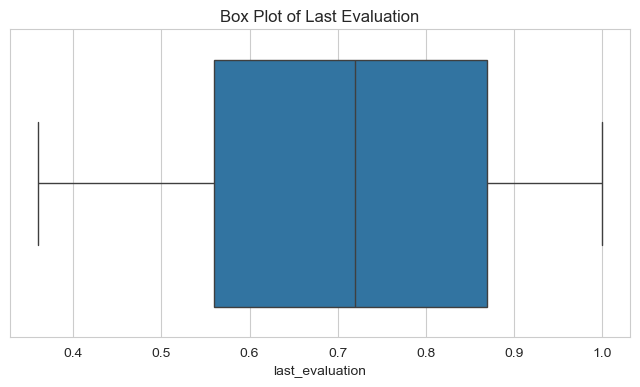

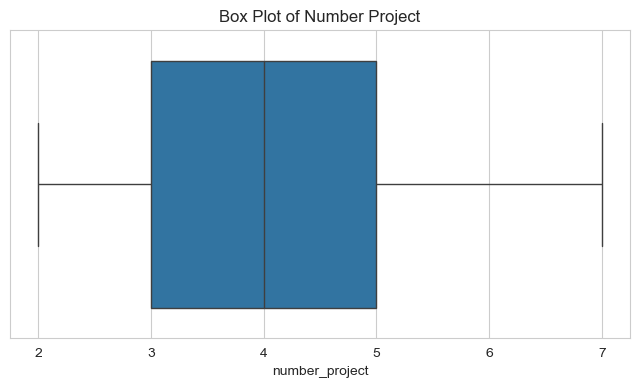

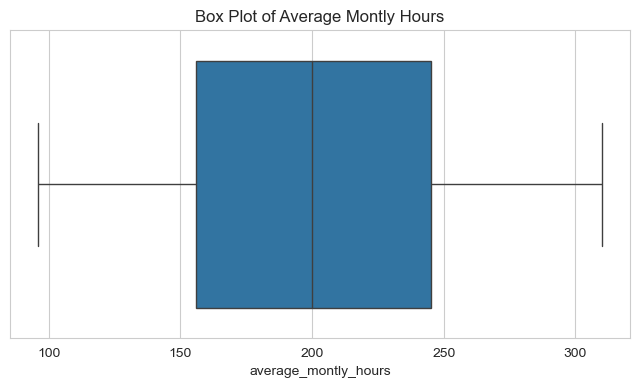

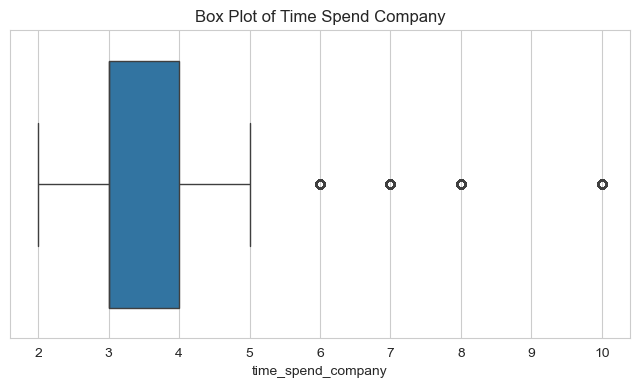

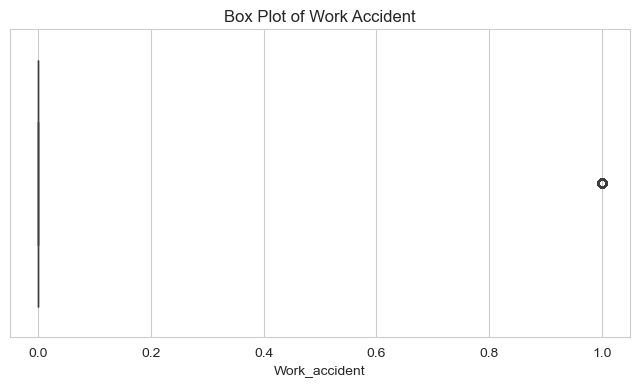

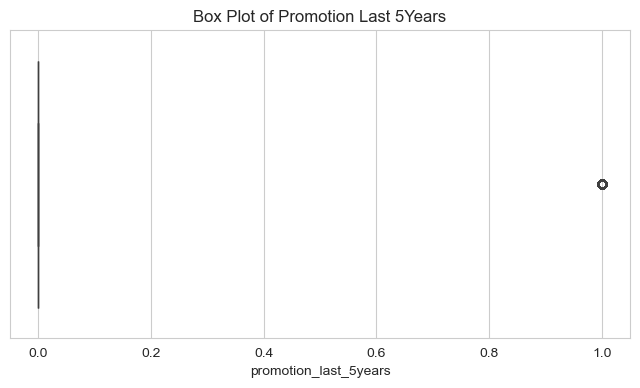

In [54]:
print("\n--- Checking for Outliers in Numerical Data (using Box Plots) ---")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.show()

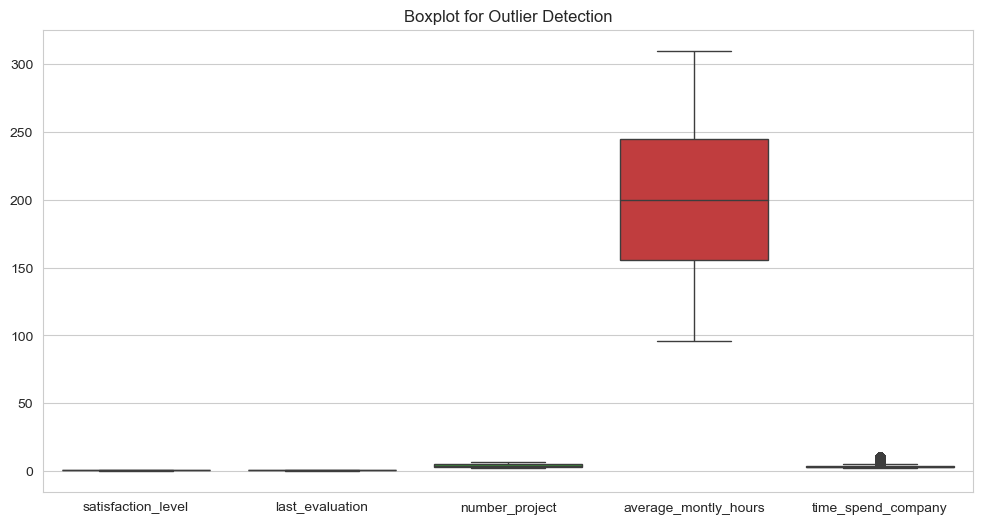

In [55]:
# Create a boxplot to detect outliers in numarical data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.title('Boxplot for Outlier Detection')
plt.show()


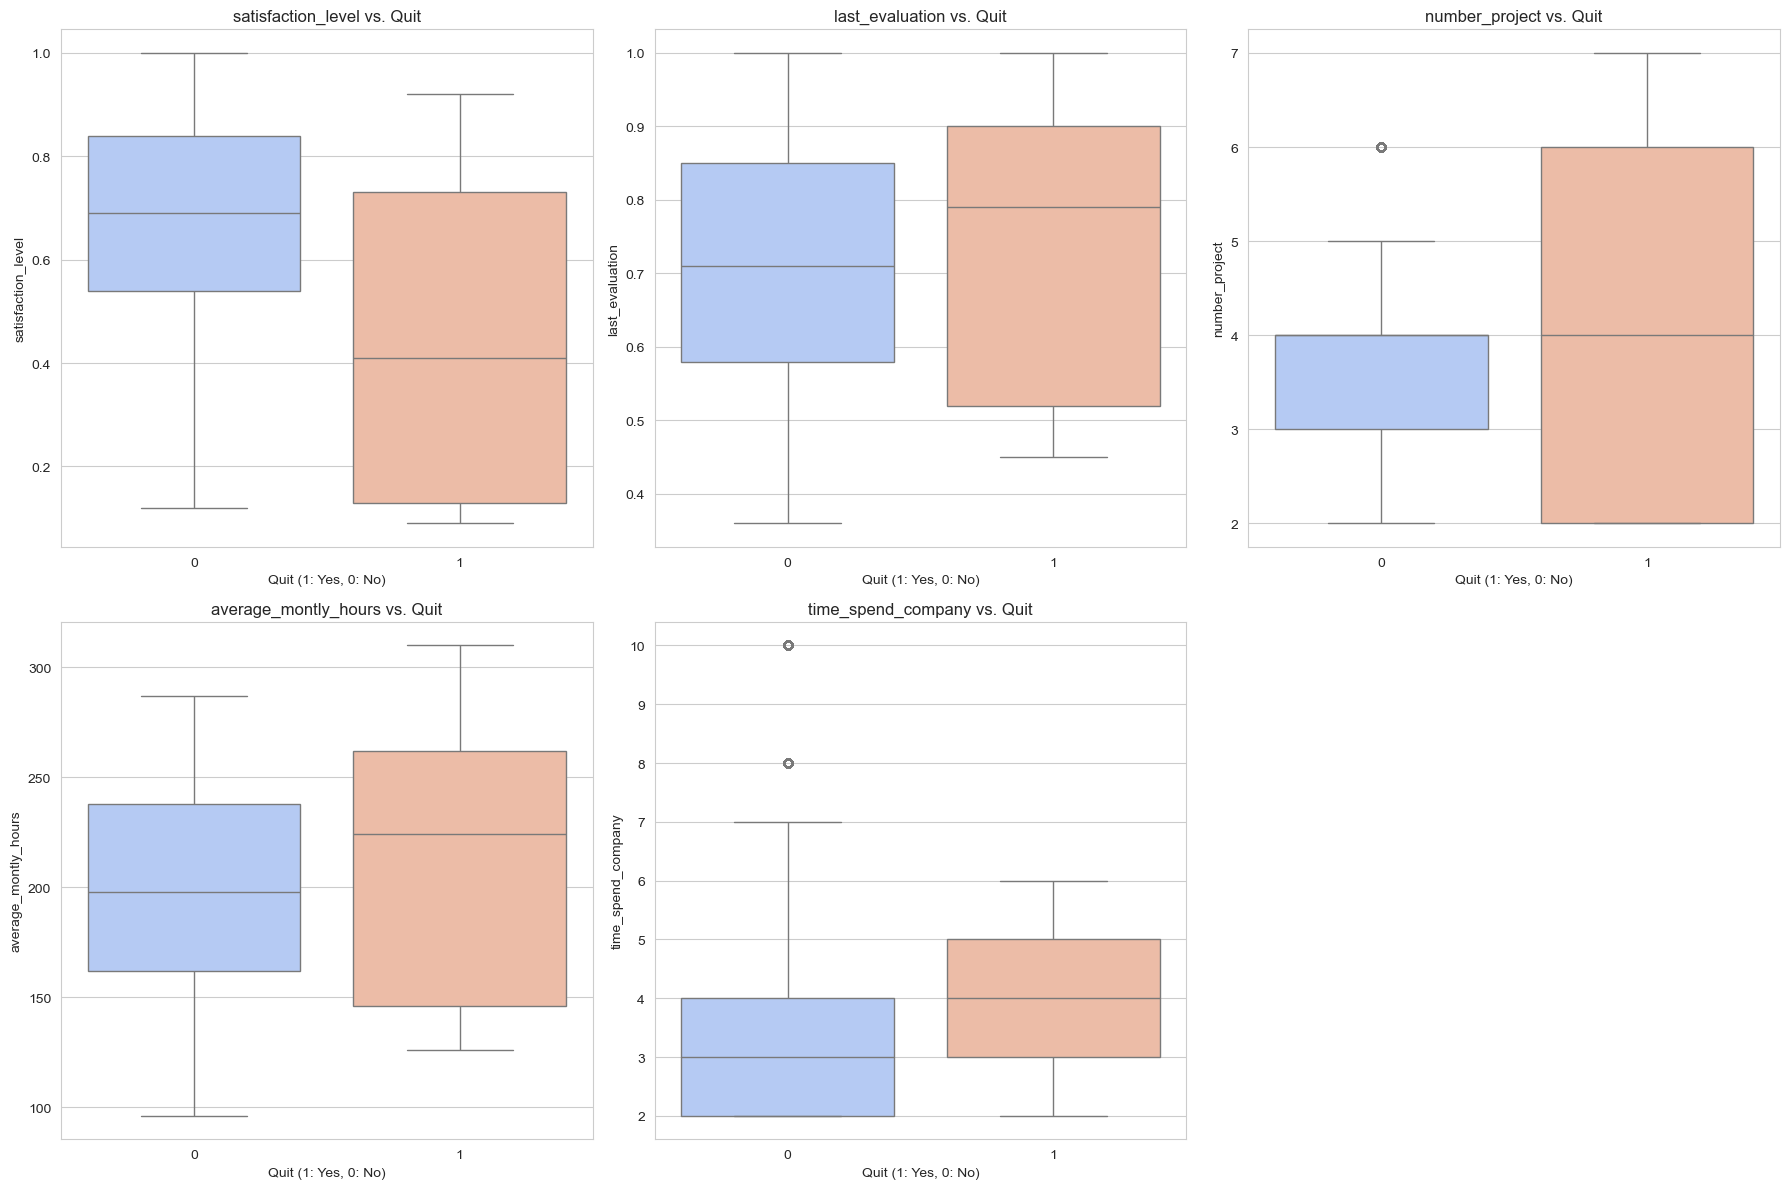

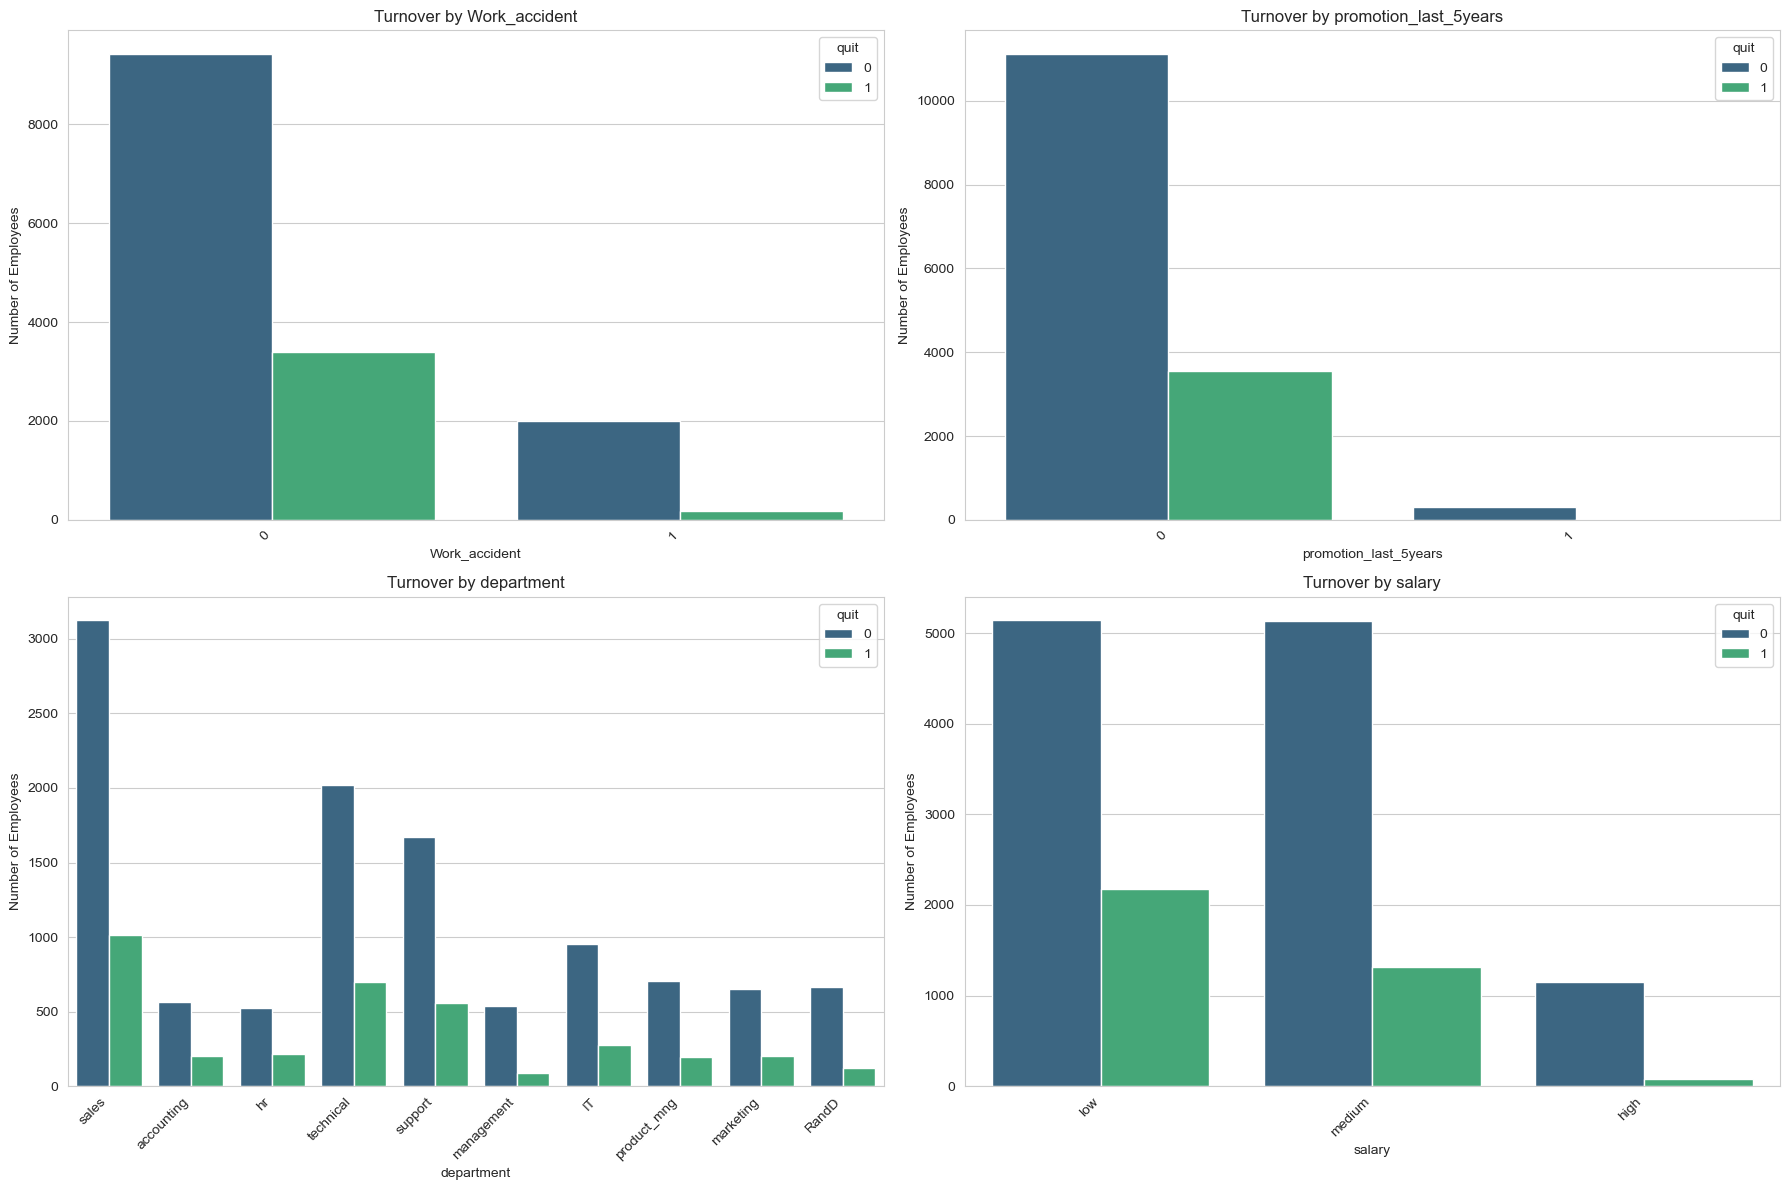

In [56]:
# --- Bivariate Analysis (Feature(numarical & Categorical)) vs. Target) ---
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs. Quit')
    plt.xlabel('Quit (1: Yes, 0: No)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 12))
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='quit', data=df, palette='viridis')
    plt.title(f'Turnover by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
df_encoded = df.copy()
# Convert categorical variables to numerical
df_encoded['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
     

In [58]:
df_encoded["salary"].value_counts()

salary
0    7316
1    6446
2    1237
Name: count, dtype: int64

In [59]:
df_encoded["department"].value_counts()
     

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [60]:
df_encoded = pd.get_dummies(df_encoded, columns=['department'])
df_encoded.head(40)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
6,0.10,0.77,6,247,4,0,1,0,0,False,False,False,False,False,False,False,True,False,False
7,0.92,0.85,5,259,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
8,0.89,1.00,5,224,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
9,0.42,0.53,2,142,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [61]:
# Check the target variable distribution
print(df_encoded['quit'].value_counts())
     

quit
0    11428
1     3571
Name: count, dtype: int64


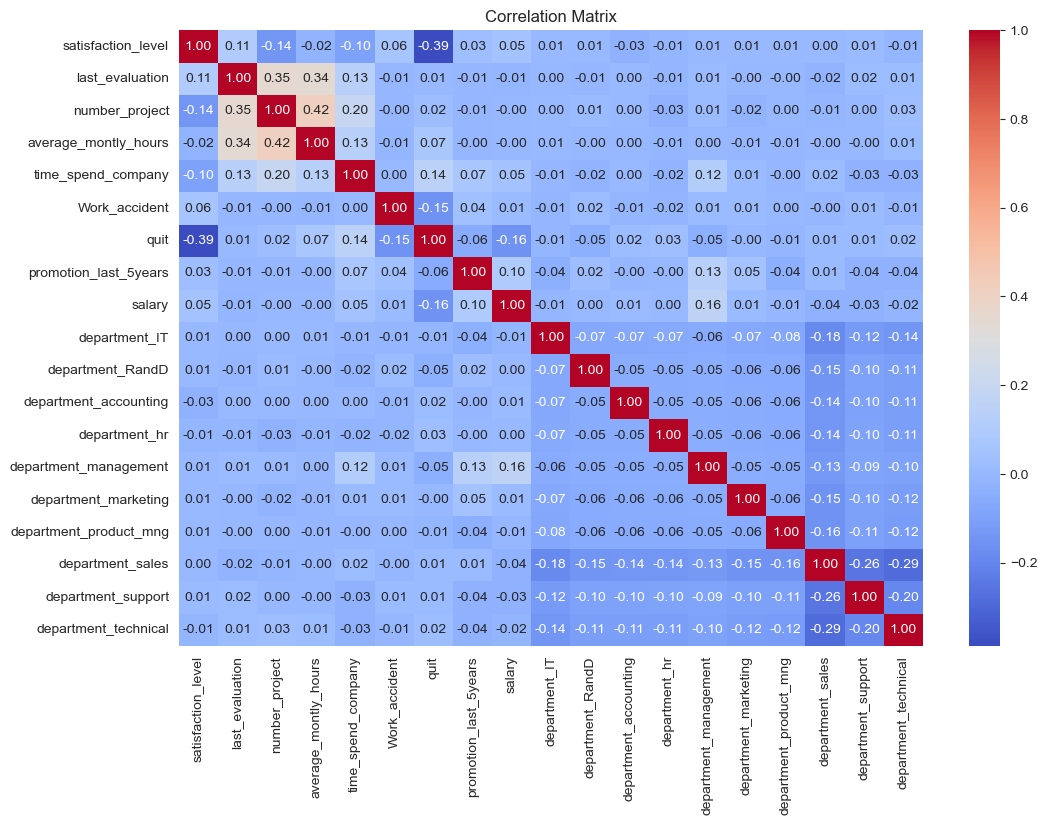

In [62]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
     

In [63]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


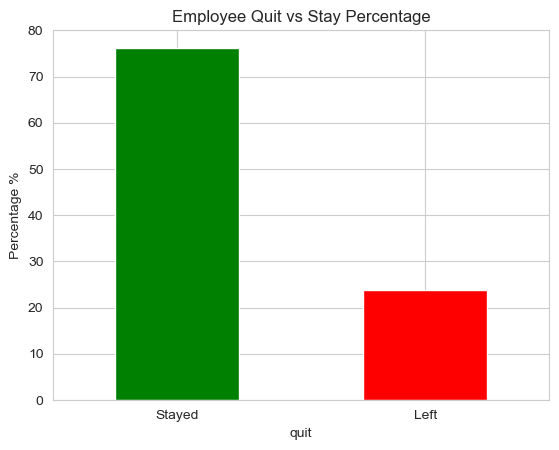

In [64]:
quit_counts = df['quit'].value_counts(normalize=True) * 100
quit_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Employee Quit vs Stay Percentage")
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.ylabel("Percentage %")
plt.show()

In [65]:
print(quit_counts)

quit
0    76.191746
1    23.808254
Name: proportion, dtype: float64


In [67]:
# Get department column names
department_cols = [col for col in df_encoded.columns if col.startswith("department_")]
department_cols

['department_IT',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical']

In [69]:
department_data = df_encoded.melt(id_vars=["quit"],
                                  value_vars=department_cols,
                                  var_name="department",
                                  value_name="is_in_department")
department_data.head()

,quit,department,is_in_department
0,1,department_IT,False
1,1,department_IT,False
2,1,department_IT,False
3,1,department_IT,False
4,1,department_IT,False


In [70]:
department_quit_rate = (
    department_data[department_data["is_in_department"]].groupby("department")["quit"].mean().sort_values(ascending=False)
)
department_quit_rate.head()

department
department_hr            0.290934
department_accounting    0.265971
department_technical     0.256250
department_support       0.248991
department_sales         0.244928
Name: quit, dtype: float64

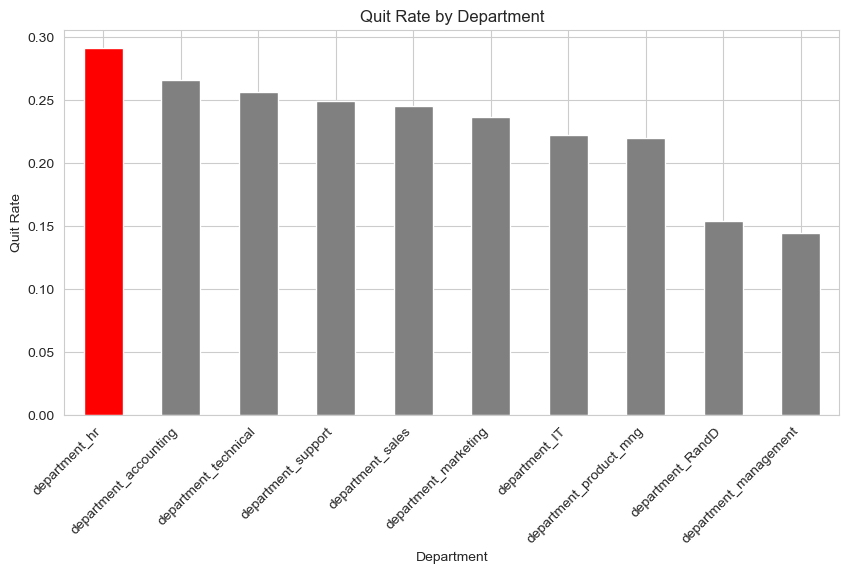

In [71]:
colors = ["red" if dept == "department_hr" else "gray" for dept in department_quit_rate.index]
department_quit_rate.plot(kind="bar",color = colors,figsize=(10,5))
plt.title("Quit Rate by Department")
plt.ylabel("Quit Rate")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
df_encoded.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
quit                      0
promotion_last_5years     0
salary                    0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

In [78]:
df_encoded["average_montly_hours"].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [79]:
import seaborn as sns

df_encoded["hours_level"] = pd.cut(df_encoded['average_montly_hours'],bins = [0,160,200,240,310],labels=["low","medium","high","very high"])
df_encoded.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,low
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,very high
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,very high
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,high
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,low


In [80]:
df_encoded.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
quit                      0
promotion_last_5years     0
salary                    0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
hours_level               0
dtype: int64

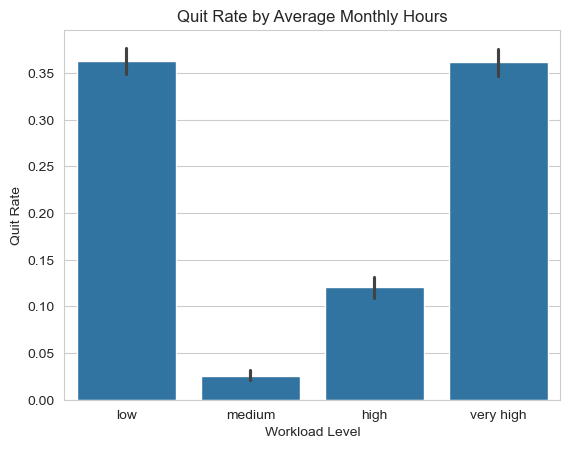

In [81]:
sns.barplot(x="hours_level",y="quit",data=df_encoded)
plt.title("Quit Rate by Average Monthly Hours")
plt.ylabel("Quit Rate")
plt.xlabel("Workload Level")
plt.show()

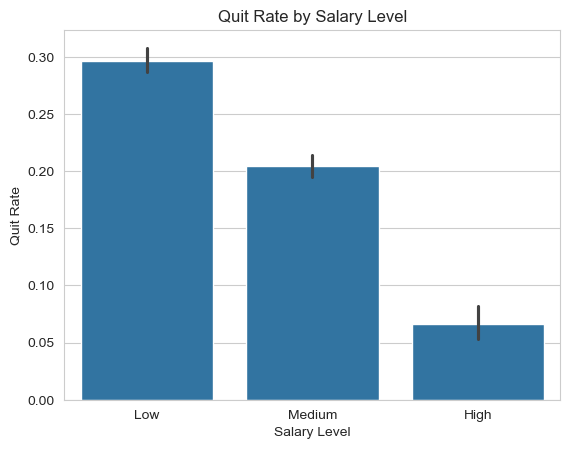

In [82]:
sns.barplot(x="salary",y="quit",data=df_encoded)
plt.title("Quit Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Quit Rate")
plt.xticks(ticks=[0,1,2],labels=["Low","Medium","High"])
plt.show()

In [83]:

satisfaction_by_quit = df_encoded.groupby("quit")["satisfaction_level"].mean().reset_index()

In [84]:
satisfaction_by_quit.head()

,quit,satisfaction_level
0,0,0.666810
1,1,0.440098


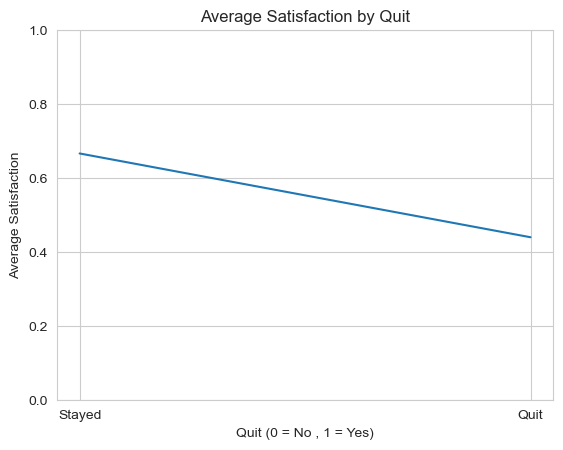

In [85]:
sns.lineplot(x="quit",y="satisfaction_level",data=satisfaction_by_quit)
plt.title("Average Satisfaction by Quit")
plt.ylabel("Average Satisfaction")
plt.xlabel("Quit (0 = No , 1 = Yes)")
plt.xticks([0,1], ["Stayed","Quit"])
plt.ylim(0,1)
plt.grid(True)
plt.show()

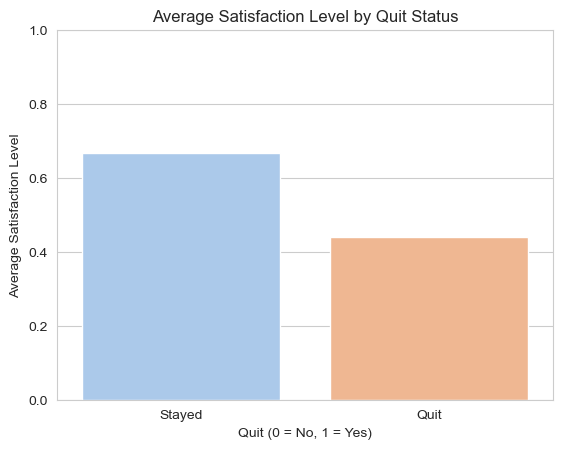

In [86]:
sns.barplot(x='quit', y='satisfaction_level', data=df_encoded, ci=None, palette='pastel')
plt.title("Average Satisfaction Level by Quit Status")
plt.xlabel("Quit (0 = No, 1 = Yes)")
plt.ylabel("Average Satisfaction Level")
plt.xticks([0, 1], ['Stayed', 'Quit'])
plt.ylim(0, 1)
plt.show()

In [87]:
df["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [88]:
df['salary_encoded'] = df_encoded['salary']
department_salary_mean = df.groupby("department")["salary_encoded"].mean().sort_values(ascending=False)
print(department_salary_mean)
     

department
management     1.071429
accounting     0.629726
marketing      0.624709
hr             0.607578
RandD          0.602287
product_mng    0.575388
IT             0.571312
technical      0.569485
sales          0.557971
support        0.549125
Name: salary_encoded, dtype: float64


In [89]:
highest_salary_department = department_salary_mean.idxmax()
highest_salary_value = department_salary_mean.max()

In [90]:
highest_salary_value

1.0714285714285714

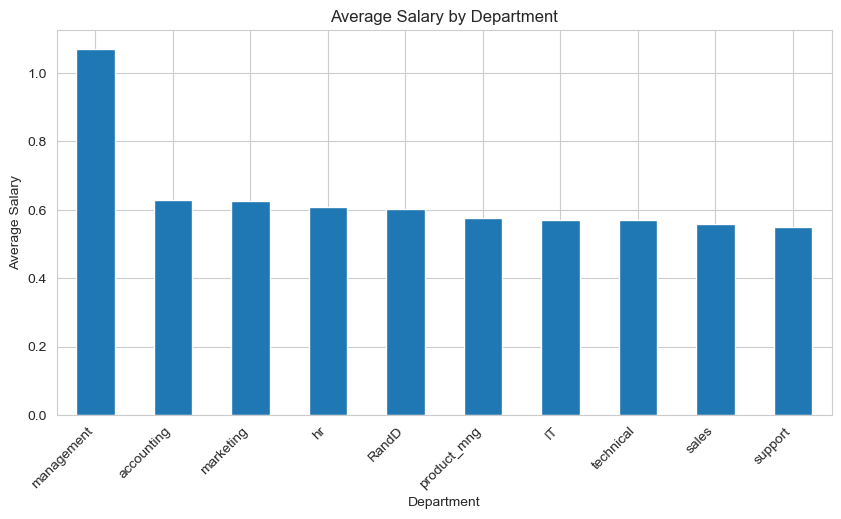

In [91]:

department_salary_mean.plot(kind="bar",figsize=(10,5))
plt.title("Average Salary by Department")
plt.ylabel("Average Salary")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.show()

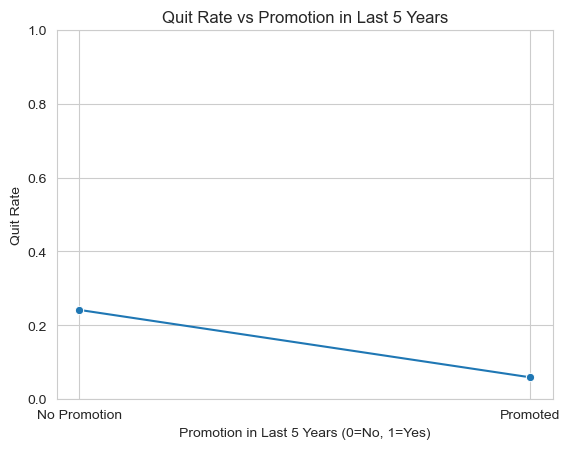

In [92]:
# calculate quit rate grouped by promotion status
promotion_quit_rate = df_encoded.groupby("promotion_last_5years")["quit"].mean().reset_index()
sns.lineplot(x='promotion_last_5years', y='quit', data=promotion_quit_rate, marker='o')
plt.title("Quit Rate vs Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years (0=No, 1=Yes)")
plt.ylabel("Quit Rate")
plt.xticks([0, 1], ['No Promotion', 'Promoted'])
plt.ylim(0, 1)  # Optional: to keep y-axis consistent
plt.grid(True)
plt.show()

In [93]:

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   satisfaction_level      14999 non-null  float64 
 1   last_evaluation         14999 non-null  float64 
 2   number_project          14999 non-null  int64   
 3   average_montly_hours    14999 non-null  int64   
 4   time_spend_company      14999 non-null  int64   
 5   Work_accident           14999 non-null  int64   
 6   quit                    14999 non-null  int64   
 7   promotion_last_5years   14999 non-null  int64   
 8   salary                  14999 non-null  int64   
 9   department_IT           14999 non-null  bool    
 10  department_RandD        14999 non-null  bool    
 11  department_accounting   14999 non-null  bool    
 12  department_hr           14999 non-null  bool    
 13  department_management   14999 non-null  bool    
 14  department_marketing  

In [94]:
df_encoded["hours_level"].value_counts()

hours_level
low          4340
very high    4208
high         3267
medium       3184
Name: count, dtype: int64

In [95]:
# Encode the hours level column
df_encoded["hours_level"] = df_encoded["hours_level"].map({"low":0,"medium":1,"high":2,"very high":3})

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,2
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [96]:
df_encoded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'hours_level'],
      dtype='object')

In [98]:
df_encoded.to_csv(r"D:\NTI Machine Learning\project 1\EMPLOYEE_TURNOVER.csv", index=False)


In [99]:
df_encoded.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
quit                      0
promotion_last_5years     0
salary                    0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
hours_level               0
dtype: int64

In [100]:
#Feature Engineering & Selection

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [102]:
# Load datasets
X_train = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\X_train_scaled.csv")
X_test = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\X_test_scaled.csv")

In [103]:
print(X_train.shape)
print(X_train.info())
X_train.describe()

(18284, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284 entries, 0 to 18283
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      18284 non-null  float64
 1   last_evaluation         18284 non-null  float64
 2   number_project          18284 non-null  float64
 3   average_montly_hours    18284 non-null  float64
 4   time_spend_company      18284 non-null  float64
 5   Work_accident           18284 non-null  float64
 6   promotion_last_5years   18284 non-null  float64
 7   salary                  18284 non-null  float64
 8   department_IT           18284 non-null  float64
 9   department_RandD        18284 non-null  float64
 10  department_accounting   18284 non-null  float64
 11  department_hr           18284 non-null  float64
 12  department_management   18284 non-null  float64
 13  department_marketing    18284 non-null  float64
 14  department_product_mng  18

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
count,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000,18284.000000
mean,0.007313,-0.035739,-0.069842,-0.006825,0.607963,0.098939,0.014165,0.494531,0.068967,0.037847,0.042879,0.047637,0.030683,0.050700,0.050700,0.269635,0.140943,0.176220,-0.165372
std,0.658384,0.524598,0.478660,0.536448,1.304486,0.298588,0.118176,0.605561,0.253406,0.190832,0.202590,0.213003,0.172461,0.219391,0.219391,0.443782,0.347972,0.381017,0.421247
min,-1.139369,-1.078177,-0.666667,-1.069307,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
25%,-0.405547,-0.553659,-0.666667,-0.514851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.594453,0.446341,0.333333,0.485149,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333
max,1.114600,0.786778,1.000000,1.049505,7.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333


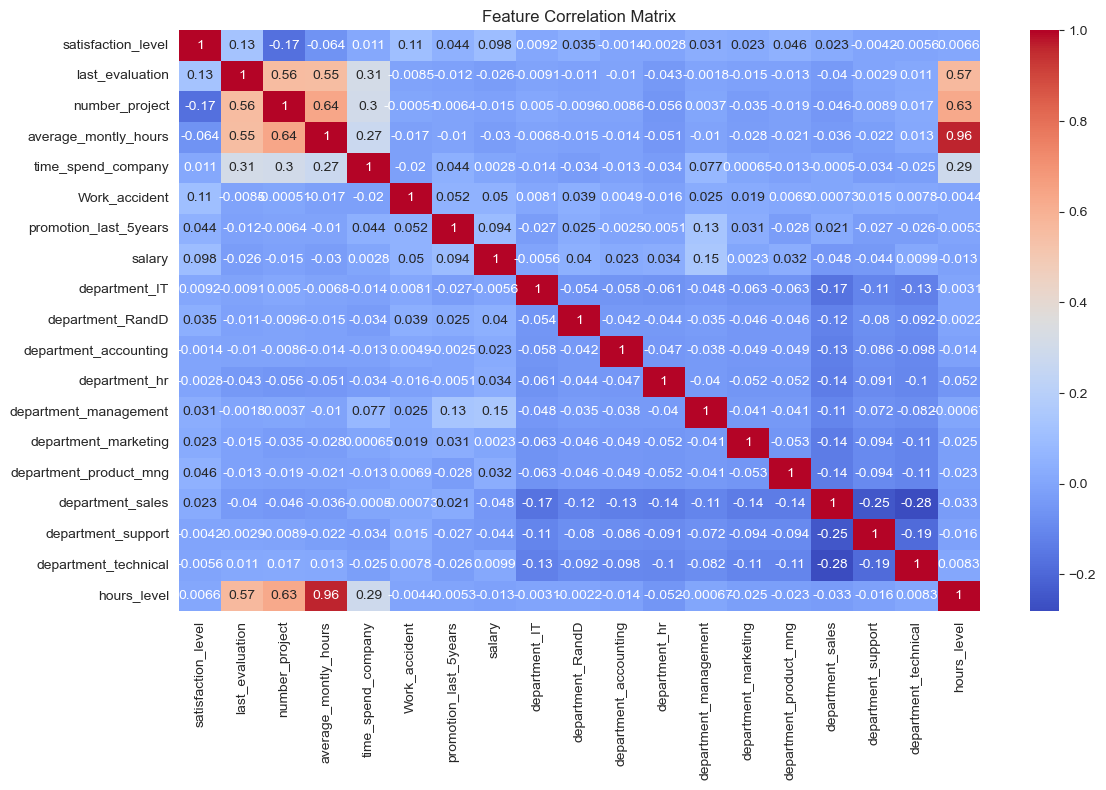

In [104]:
# Step1: Analyze Feature Importance: Correlation - Random Forest - Mutual Info

# 1. Correlation matrix between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


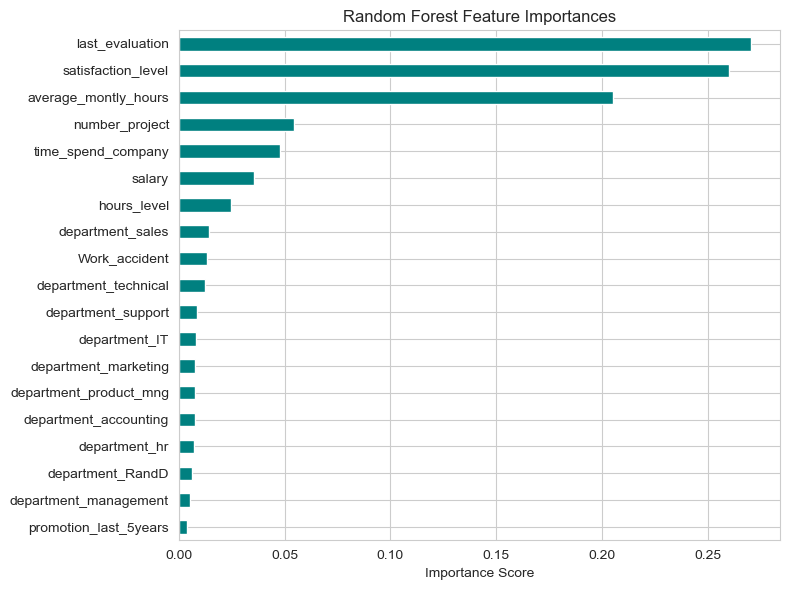

In [105]:
# 2. Random Forest feature importance (using dummy target just for analysis)
dummy_target = np.random.randint(0, 2, size=len(X_train))
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, dummy_target)
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()

plt.figure(figsize=(8, 6))
rf_importance.plot(kind='barh', color='teal')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

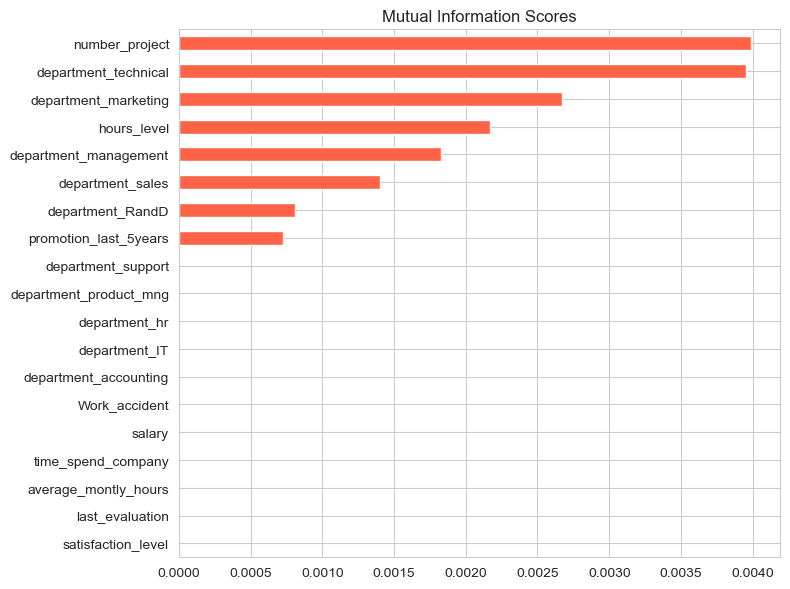

In [106]:
# 3. Mutual Information scores (also using dummy target)
mi_scores = mutual_info_classif(X_train, dummy_target)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values()

plt.figure(figsize=(8, 6))
mi_series.plot(kind='barh', color='tomato')
plt.title("Mutual Information Scores")
plt.tight_layout()
plt.show()

In [107]:
# Step2: Try New Features (logical enhancements)

# 1. Combine satisfaction level & last evaluation
X_train['satisfaction_eval_interaction'] = X_train['satisfaction_level'] * X_train['last_evaluation']
X_test['satisfaction_eval_interaction']  = X_test['satisfaction_level'] * X_test['last_evaluation']

# 2. Binary flag for overworked employees (worked > 250 hrs)
X_train['overworked'] = (X_train['average_montly_hours'] > 250).astype(int)
X_test['overworked']  = (X_test['average_montly_hours'] > 250).astype(int)

# 3. Workload per project
X_train['workload_per_project'] = X_train['average_montly_hours'] / (X_train['number_project'] + 1)
X_test['workload_per_project']  = X_test['average_montly_hours'] / (X_test['number_project'] + 1)

# 4. Performance to satisfaction ratio
X_train['performance_satisfaction_ratio'] = X_train['last_evaluation'] / (X_train['satisfaction_level'] + 0.01)
X_test['performance_satisfaction_ratio']  = X_test['last_evaluation'] / (X_test['satisfaction_level'] + 0.01)

In [108]:
# Step3: Drop Less Useful or Highly Correlated Features

# 1. Detect and drop highly correlated features (correlation > 0.85)
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]

# 2. Detect and drop low importance features (importance < 0.01)
low_importance = rf_importance[rf_importance < 0.01].index.tolist()

# 3. Drop both sets
X_train.drop(columns=list(set(high_corr + low_importance)), inplace=True)
X_test.drop(columns=list(set(high_corr + low_importance)), inplace=True)

Before PCA: (18284, 12)
After PCA: (18284, 3)


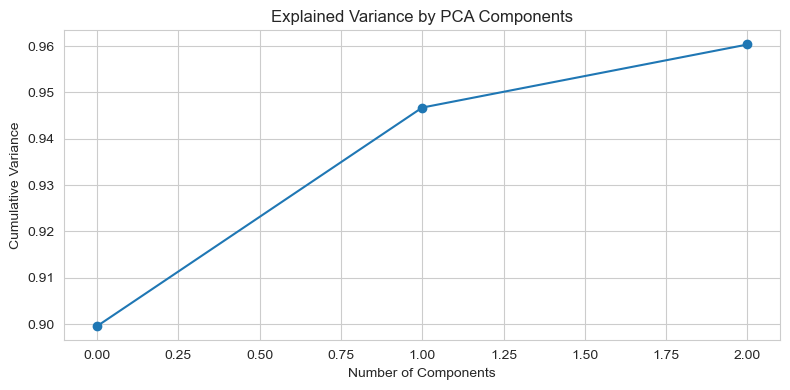

In [109]:
# Step4: Apply Dimensionality Reduction using PCA

# 1. Apply PCA (retain 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. Compare shape before & after PCA
print("Before PCA:", X_train.shape)
print("After PCA:", X_train_pca.shape)

# 3. Explained variance chart
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
#Hyperparameter_Tuning

In [111]:
import joblib
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
X_train = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\X_train_scaled.csv")
X_test = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\X_test_scaled.csv")
y_train = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\y_train_resampled.csv")
y_test = pd.read_csv(r"D:\NTI Machine Learning\New folder\Employee-Churn-Analysis--main\Employee-Churn-Analysis--main\y_test.csv")
     

In [113]:
param_grid_rf = {
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[50,60,70],
    "min_samples_split":[1,2],
    "max_features":["auto","sqrt","log2"],
    "n_estimators":[150,200,250]
}
     


In [114]:
rf = RandomForestClassifier(random_state=42)
     

In [115]:
random_search_rf = RandomizedSearchCV(
    estimator = rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring="f1",
    verbose=2,
    random_state=42,
    n_jobs=-1
)
     

In [116]:
random_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [50, 60, 70],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [1, 2],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='f1', verbose=2)

In [117]:
random_search_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'criterion': 'entropy'}

In [118]:
best_rf = random_search_rf.best_estimator_
best_rf
     

RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=250,
                       random_state=42)

In [119]:
random_search_rf.best_score_ # np.float64(0.9826622334553379)
#0.9835138566840816

np.float64(0.9836855223158892)

In [ ]:
#Define Parameters Gird for XG Boost

In [121]:
!pip install xgboost


  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)


In [124]:
from xgboost import XGBClassifier
param_grid_xgb = {
    "n_estimator":[300,350,400],
    "max_depth":[3,5,10],
    "learning_rate":[0.2,0.3,0.4],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "gamma":[0,0.1,0.2],
    "scale_pos_weight":[1,3,5]
}

In [125]:
xgb = XGBClassifier(use_label_encoded= False, eval_metric = "logloss")

In [126]:
random_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid_xgb,
    n_iter=10,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1

)
     


In [127]:
random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.2, 0.3, 0.4],
                                        'max_depth': [3, 5, 10],
                                        'n_estimator': [300, 350, 400],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=2)

In [128]:
random_search_xgb.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 3,
 'n_estimator': 300,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [129]:
random_search_xgb.best_score_
     

np.float64(0.9862437683791491)

In [130]:
#Evaluate Best Models

In [131]:
best_rf = random_search_rf.best_estimator_
best_xgb = random_search_xgb.best_estimator_

# Evaluate on test data
print("Random Forest Report:")
print(classification_report(y_test, best_rf.predict(X_test)))

print("XGBoost Report:")
print(classification_report(y_test, best_xgb.predict(X_test)))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

XGBoost Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [132]:
#Save Best Models

In [133]:
import joblib

# Save the trained Random Forest model to a file in the current directory
joblib.dump(best_rf, "best_rf.pkl")

# Save the trained XGBoost model to a file in the current directory
joblib.dump(best_xgb, "best_xgboost.pkl")


['best_xgboost.pkl']

In [134]:
#Load the pre-trained Models

In [138]:
import os
import joblib

# Set the directory where you want to save the models
save_dir = r"D:\New folder"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the Random Forest model
joblib.dump(best_rf, os.path.join(save_dir, "best_rf.pkl"))

# Save the XGBoost model
joblib.dump(best_xgb, os.path.join(save_dir, "best_xgboost.pkl"))


['D:\\New folder\\best_xgboost.pkl']

In [ ]:
from sklearn.model_selection import cross_val_score
cv = 5
scoring = "f1"

# tuned Models
scores_best_rf = cross_val_score(best_rf,X_train,y_train,cv=cv,scoring=scoring)
scores_best_xgb = cross_val_score(best_xgb,X_train,y_train,cv=cv,scoring=scoring)

# Pre-trained Models
scores_rf_model = cross_val_score(rf_model,X_train,y_train,cv=cv,scoring=scoring)

# Re-train the XGBoost model with the same parameters
xgb_model_retrained = XGBClassifier(use_label_encoder=False,
                                     eval_metric='logloss',
                                     n_estimators=300,
                                     max_depth=10,
                                     learning_rate=0.3,
                                     gamma=0,
                                     colsample_bytree=0.8,
                                     subsample=1.0,
                                     scale_pos_weight=5)
scores_xgb_model = cross_val_score(xgb_model_retrained,X_train,y_train,cv=cv,scoring=scoring)

In [140]:
scores_best_xgb

array([0.97936726, 0.98686371, 0.98853086, 0.9893588 , 0.98631637])

In [152]:
import joblib

rf_model = joblib.load(r"D:\New folder\best_rf.pkl")          
xgb_model = joblib.load(r"D:\New folder\best_xgboost.pkl")


In [158]:
print("scores_rf_model =", scores_rf_model)
print("scores_xgb_model =", scores_xgb_model)
print("scores_best_rf =", scores_best_rf)
print("scores_best_xgb =", scores_best_xgb)


scores_rf_model = [Ellipsis]
scores_xgb_model = [Ellipsis]
scores_best_rf = [Ellipsis]
scores_best_xgb = [Ellipsis]


In [159]:
from sklearn.model_selection import cross_val_score

cv = 5
scoring = "f1"

# Ensure that X_train and y_train are correctly defined before proceeding

# Execute this code to actually compute the cross-validation scores

scores_best_rf = cross_val_score(best_rf, X_train, y_train, cv=cv, scoring=scoring)
scores_best_xgb = cross_val_score(best_xgb, X_train, y_train, cv=cv, scoring=scoring)

scores_rf_model = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring=scoring)

xgb_model_retrained = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    gamma=0,
    colsample_bytree=0.8,
    subsample=1.0,
    scale_pos_weight=5
)

scores_xgb_model = cross_val_score(xgb_model_retrained, X_train, y_train, cv=cv, scoring=scoring)


In [161]:
import numpy as np

Scores = {
    "Pre-trained Random Forest": np.mean(scores_rf_model),
    "Pre-trained XGBoost": np.mean(scores_xgb_model),
    "Tuned Random Forest": np.mean(scores_best_rf),
    "Tuned XGBoost": np.mean(scores_best_xgb)
}

for model, score in Scores.items():
    print(f"{model}: {score:.4f}")


Pre-trained Random Forest: 0.9837
Pre-trained XGBoost: 0.9858
Tuned Random Forest: 0.9837
Tuned XGBoost: 0.9861


In [163]:
model_names = list(Scores.keys())
model_names
     

['Pre-trained Random Forest',
 'Pre-trained XGBoost',
 'Tuned Random Forest',
 'Tuned XGBoost']

In [162]:
f1_scores = list(Scores.values())
f1_scores

[np.float64(0.9836855223158892),
 np.float64(0.985828591421207),
 np.float64(0.9836855223158892),
 np.float64(0.9860873992522228)]

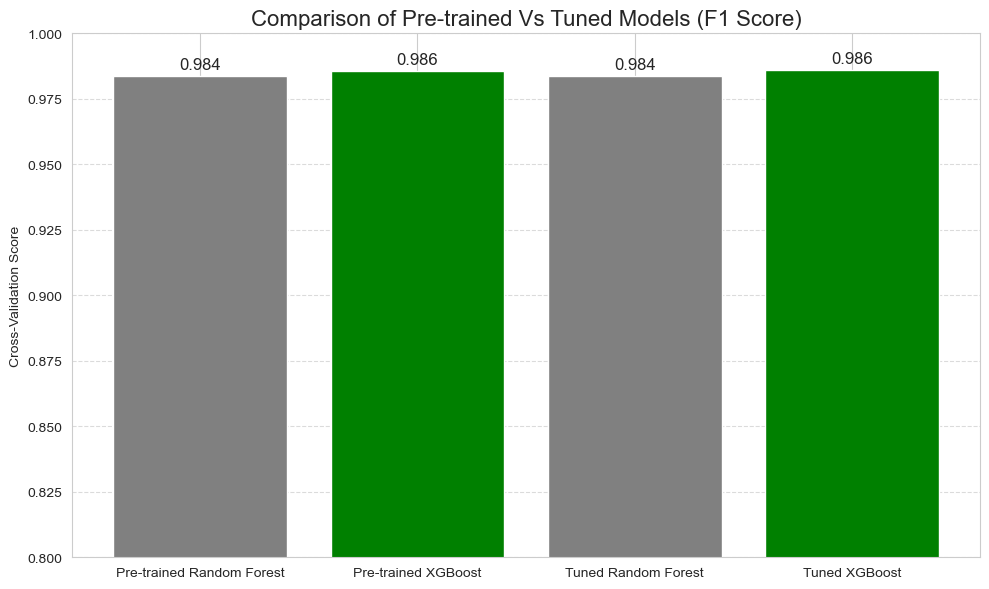

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, f1_scores, color=["gray", "green", "gray", "green"])
plt.title("Comparison of Pre-trained Vs Tuned Models (F1 Score)", fontsize=16)
plt.ylabel("Cross-Validation Score")
plt.ylim(0.8, 1.0)

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.3f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha="center",
                 fontsize=12)

plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [166]:
best_model_name = max(Scores,key=Scores.get)
best_model_name

'Tuned XGBoost'

In [167]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [168]:
def evaluate_model(model,X_test,y_test):
  y_pred = model.predict(X_test)

  print("Accuracy:", accuracy_score(y_test,y_pred))
  print("Precision:", precision_score(y_test,y_pred))
  print("Recall:", recall_score(y_test,y_pred))
  print("F1 Score:", f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  print("Classification Report:\n",classification_report(y_test,y_pred))

In [169]:

print("Basline Random Forest:")
evaluate_model(rf_model,X_test,y_test)

print("\nTuned Random Forest:")
evaluate_model(best_rf,X_test,y_test)

Basline Random Forest:
Accuracy: 0.9893333333333333
Precision: 0.9885386819484241
Recall: 0.9663865546218487
F1 Score: 0.9773371104815864
Confusion Matrix:
 [[2278    8]
 [  24  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Tuned Random Forest:
Accuracy: 0.9893333333333333
Precision: 0.9885386819484241
Recall: 0.9663865546218487
F1 Score: 0.9773371104815864
Confusion Matrix:
 [[2278    8]
 [  24  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0

In [172]:
print("\nBaseline XGBoost:")
evaluate_model(xgb_model, X_test, y_test)

print("\nTuned XGBoost:")
evaluate_model(best_xgb, X_test, y_test)



Baseline XGBoost:
Accuracy: 0.9856666666666667
Precision: 0.97054698457223
Recall: 0.969187675070028
F1 Score: 0.9698668535388928
Confusion Matrix:
 [[2265   21]
 [  22  692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Tuned XGBoost:
Accuracy: 0.9856666666666667
Precision: 0.97054698457223
Recall: 0.969187675070028
F1 Score: 0.9698668535388928
Confusion Matrix:
 [[2265   21]
 [  22  692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
we

In [ ]:
#Save the Best Model for Deployment

In [173]:
joblib.dump(best_xgb,r"D:\New folder")

PermissionError: [Errno 13] Permission denied: 'D:\\New folder'